In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=256) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('ecfp_ndonor.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [6]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_992.csv')#Put address
efp_996=pd.read_csv('neuralfp_992.csv')
efp_996=np.array(efp_996)
Isomer=input[['Isomer']].copy()
X_996=np.concatenate((efp_996,Isomer),axis=1)
print(len(efp_996))
#Isomer_positive=input_positive[['Isomer']].copy()
#X_996=np.concatenate((efp_996,Isomer_positive),axis=1)
#X_785=col_normalize(X_785)
X_996.shape

992


(992, 257)

In [7]:
#assign the Hammett constants to Y
Y_996=input[['Hammett Constant']].copy()
Y_996=np.array(Y_996)

In [8]:
efp_ndonor=pd.read_csv('neuralfp_10.csv')
efp_ndonor=np.array(efp_ndonor)
X_ndonor=efp_ndonor
X_ndonor.shape

(10, 257)

In [9]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((992,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((992,1000),dtype=float)
Y_target_train=np.zeros((992,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [10]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [11]:
# list(X_996).index("infinity")

In [12]:
for m in range(0,1000):
    #positive part
    index_996=np.random.choice(992, size=992, replace=1)
    X_train=X_996[index_996]
    Y_train=Y_996[index_996]
    X_test=np.delete(X_train,index_996,axis=0)
    Y_test=np.delete(Y_train,index_996,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_996)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [13]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.76760000e-01,  4.62000000e-02,  7.20200000e-02, -3.32950000e-01,
       -3.61900000e-01,  3.99695714e-01,  4.70790000e-01,  3.26640000e-01,
        2.11640000e-01,  5.41670000e-01,  5.74620000e-01,  7.29480000e-01,
        7.83060000e-01,  3.10390000e-01,  3.25210000e-01,  3.14190000e-01,
        3.18860000e-01,  4.59750000e-01,  5.03670000e-01,  1.90630000e-01,
        1.02270000e-01,  4.10080000e-01,  4.44400000e-01,  3.98210000e-01,
        4.92600000e-01,  4.22680000e-01,  4.82320000e-01,  5.12103333e-01,
        5.35856667e-01,  2.98830000e-01,  3.14260000e-01,  4.61540000e-01,
        5.22150000e-01,  4.29400000e-02, -2.08433333e-02,  1.42630000e-01,
        1.42935000e-01, -9.24100000e-02, -1.30930000e-01, -7.32600000e-02,
       -1.39070000e-01, -4.95100000e-02,  1.63470000e-01, -1.30640000e-01,
        1.31563333e-01,  1.33020500e-01,  1.87550000e-01,  1.69990000e-01,
        5.46575000e-02, -6.87500000e-02,  1.33476667e-01,  1.23771667e-01,
        1.26530000e-01,  

In [14]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.05284035, 0.11106016, 0.10975755, 0.27787191, 0.24152969,
       0.14477089, 0.13743972, 0.16679961, 0.19041037, 0.06786244,
       0.08174873, 0.1493075 , 0.15873259, 0.09031361, 0.11938993,
       0.11152284, 0.12734088, 0.10121953, 0.10106053, 0.12543486,
       0.1446919 , 0.07365863, 0.08420356, 0.06650937, 0.07991896,
       0.06932112, 0.07535528, 0.1208613 , 0.12914178, 0.06275772,
       0.08213557, 0.09748245, 0.1115602 , 0.0789022 , 0.09806987,
       0.09172995, 0.10167404, 0.08547568, 0.07086914, 0.07146588,
       0.10845845, 0.09549796, 0.15359902, 0.11255661, 0.0911734 ,
       0.10739898, 0.08366419, 0.10268544, 0.11844224, 0.16179968,
       0.07633473, 0.07632656, 0.13601909, 0.14519364, 0.13780492,
       0.1691601 , 0.20428665, 0.26405206, 0.08749121, 0.13567715,
       0.15004947, 0.15696172, 0.16726915, 0.18606714, 0.07732907,
       0.06808153, 0.12714043, 0.14392986, 0.18071386, 0.21394076,
       0.25135222, 0.08164437, 0.10169362, 0.09173324, 0.11429

In [15]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [16]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_996)
MSE_all

0.003690971285067403

In [31]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,        NC,        N,        NCF3,       NNO2")
Y_ndonor_mean

        NOC,        NC,        N,        NCF3,       NNO2


array([ 0.04764 , -0.224755,  0.45834 ,  0.38667 ,  0.11869 ,  0.12011 ,
        0.325615,  0.06956 ,  0.47595 ,  0.3908  ])

In [18]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.26500345, 0.31614161, 0.42552843, 0.34722934, 0.45991758,
       0.18303248, 0.20544228, 0.25195636, 0.20410413, 0.21936262])

In [32]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address
ndonor.T

array([[ 0.04764   ,  0.26500345],
       [-0.224755  ,  0.31614161],
       [ 0.45834   ,  0.42552843],
       [ 0.38667   ,  0.34722934],
       [ 0.11869   ,  0.45991758],
       [ 0.12011   ,  0.18303248],
       [ 0.325615  ,  0.20544228],
       [ 0.06956   ,  0.25195636],
       [ 0.47595   ,  0.20410413],
       [ 0.3908    ,  0.21936262]])

In [19]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.01701169, 0.02029447, 0.02731647, 0.02229012, 0.02952406,
       0.01174963, 0.01318821, 0.01617415, 0.01310231, 0.01408182])

In [20]:
pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 992 data points')

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


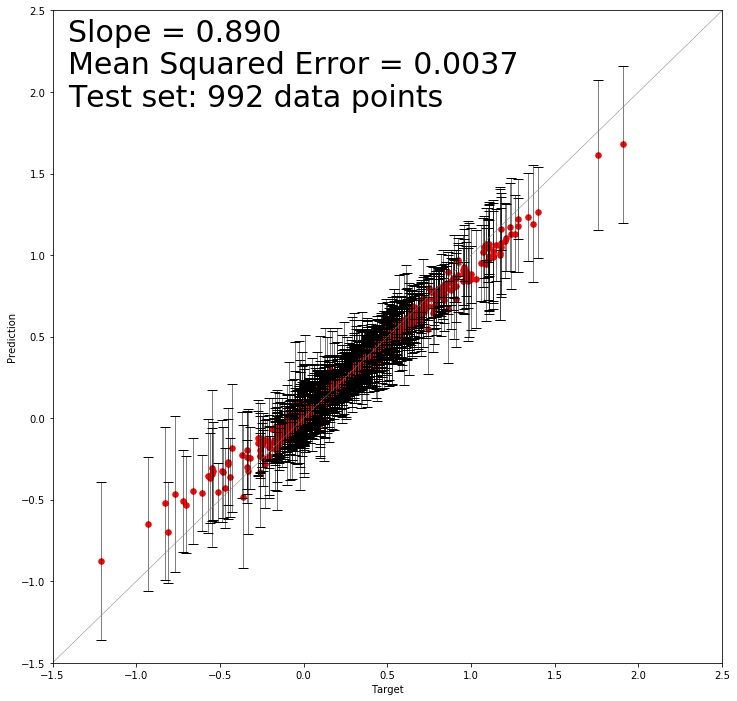

In [22]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.890', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()